In [1]:
# Multi Linear Regression 

In this example we will consider sales (no of items sold) based on:

- Social Medial Advertiseing expense (in USD 000)

- Print Medial Advertiseing expense (in USD 000)

- Website Maintenance expense (in USD 000)

- Call center average call waiting time 


Build a linear regression model to predict 'Sales' (no of items sold) using using above factors

In [2]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To visualise in the notebook
%matplotlib inline

In [3]:
multi_df = pd.read_csv("MultiSales.csv")

Now, let's check the structure of the advertising dataset.

In [4]:
# Display the first 5 rows
multi_df.head()

,id,Social,Print,Maint,Waiting,Sales
0,1,34.1,13.7,14,56,5220
1,2,30.3,13.9,8,50,4231
2,3,25.0,13.7,10,50,3520
3,4,20.1,15.3,11,58,3435
4,5,28.5,14.0,6,50,4117


In [5]:
# Let's check the columns
multi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       76 non-null     int64  
 1   Social   76 non-null     float64
 2   Print    76 non-null     float64
 3   Maint    76 non-null     int64  
 4   Waiting  76 non-null     int64  
 5   Sales    76 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 3.7 KB


In [6]:
# Check the shape of the DataFrame (no. of rows and no. of columns)
multi_df.shape

(76, 6)

In [7]:
# Let's look at some statistical information about the dataframe.
multi_df.describe()

,id,Social,Print,Maint,Waiting,Sales
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,38.500000,31.646053,16.194737,9.921053,56.921053,4856.934211
std,22.083176,4.506690,2.797232,2.938313,8.029551,865.012051
min,1.000000,20.100000,10.000000,5.000000,40.000000,2542.000000
25%,19.750000,28.750000,14.375000,7.000000,51.500000,4297.000000
50%,38.500000,31.200000,16.100000,10.000000,56.000000,4936.500000
75%,57.250000,34.875000,17.625000,12.000000,60.000000,5344.250000
max,76.000000,40.200000,26.000000,15.000000,78.000000,6856.000000


In [ ]:
# Visualising Data Using Seaborn

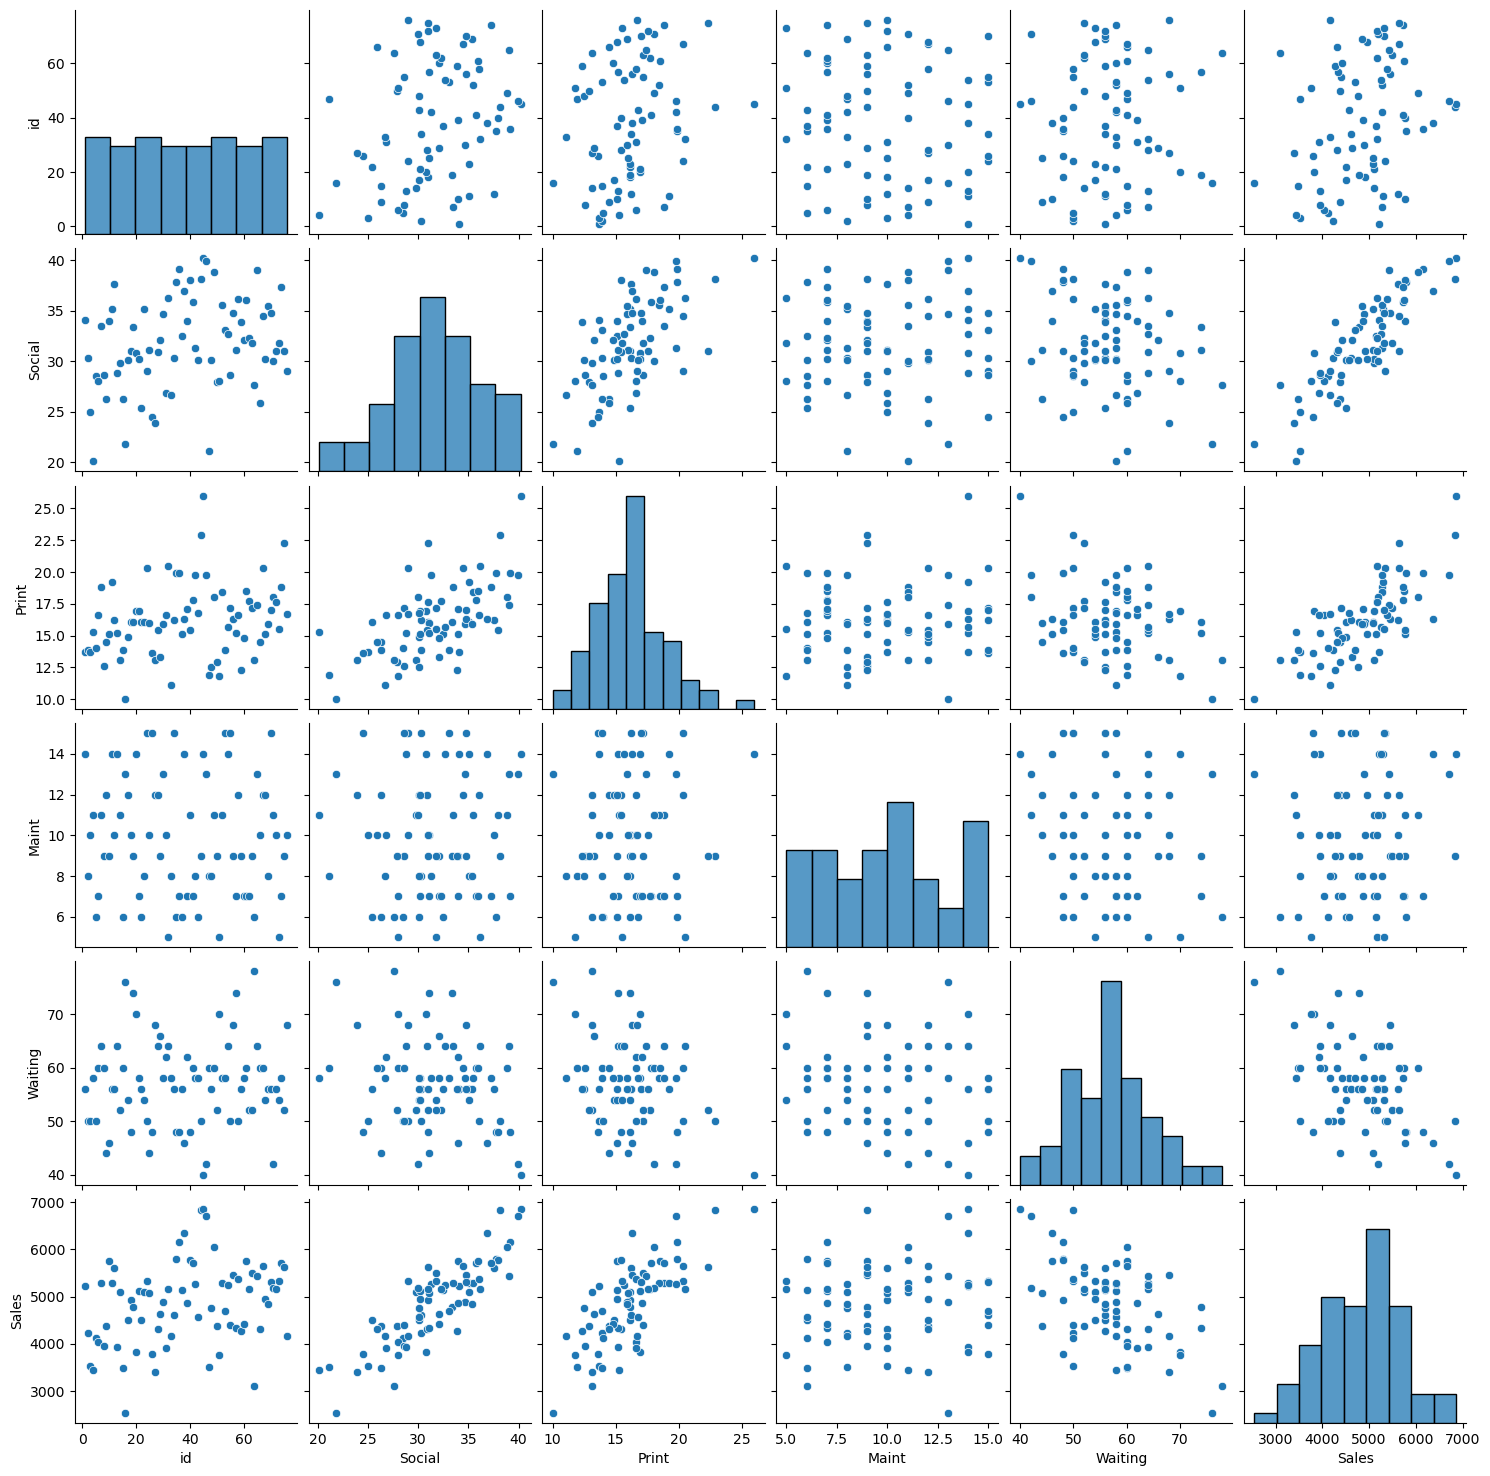

In [10]:


#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\mpg_pairpanel.png')

sns.pairplot(multi_df)
#sns.pairplot(multi_df, diag_kind='kde')   # to plot density curve instead of histogram


<AxesSubplot:>

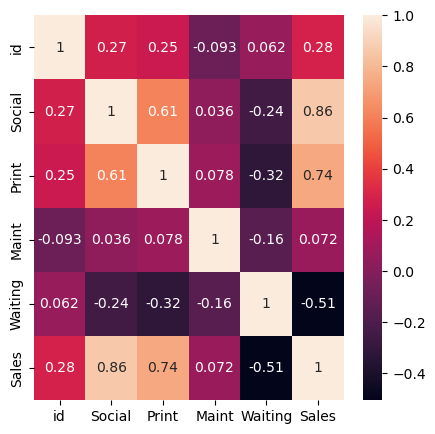

In [9]:
plt.figure(figsize = (5,5))
sns.heatmap(multi_df.corr(),annot = True)

In [ ]:
# Perfroming Simple Linear Regression

In [ ]:
# Putting feature variable to X

X = multi_df.drop(["id","Sales"], axis=1)
print(X.shape)
# Print the first 5 rows
X.head()

In [ ]:
# Putting response variable to y
y = multi_df[['Sales']]

# Print the first 5 rows
y.head()

In [ ]:
## Splitting Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=5)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
## Performing Linear Regression

In [ ]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr_model = LinearRegression()

# Fit the model using lr.fit()
lr_model.fit(X_train, y_train)

In [ ]:
## Coefficients Calculation

In [ ]:
# Print the intercept and coefficients
print("Intercept: ", lr_model.intercept_)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr_model.coef_[0][idx]))


In [ ]:
## Predictions

In [ ]:
# Making predictions on the testing set
y_pred = lr_model.predict(X_test)

In [ ]:
plt.scatter(y_pred, y_pred - y_test) 
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = min(y_pred), xmax = max(y_pred), linewidth = 2)

In [ ]:
print("Train")
print(lr_model.score(X_train, y_train))
print("Test")
print(lr_model.score(X_test, y_test))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
# following is not required since model score already displayed. Shown only for training
r_squared = r2_score(y_test, y_pred)

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

In [ ]:
### 
### for additional study reference: 
### Code for VIF BEGIN

In [ ]:
#### Define function to copute VIF value

#import statsmodels.formula.api as smf
#def calculate_vif(variables):
#    Xs = variables
#    X_column_names = variables.columns
#    for i in range(0, X_column_names.shape[0]):
#        y = Xs[X_column_names[i]] 
#        x = Xs[X_column_names.drop(X_column_names[i])]
#        r_square = smf.ols(formula="y~x", data=Xs).fit().rsquared  
#        vif = round(1 / (1 - r_square),2)
#        print (X_column_names[i], " VIF = " , vif)

In [ ]:
#### Compute VIF score for each predictor variable

#calculate_vif(variables=multi_df[['Social','Print','Maint','Waiting']])

In [ ]:
### 
### Code for VIF END
###

In [ ]:

#extra code to view actual and predicted y in the datafeame

#temp_df = pd.concat([X_test, y_test], axis=1)
#temp_df.head()

In [ ]:
#extra code to view actual and predicted y in the datafeame

#temp_df['Predicted Sales'] = y_pred
#temp_df


#### STATSMODELS
Use OLS from Statsmodels to determine which features can be dropped

In [ ]:
# Another way to code. This is NOT needed. Only for reference IF INTERESTED

### import statsmodels.api as sm
### X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
### X_train_sm = sm.add_constant(X_train_sm)
### X_train_sm.shape

In [ ]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

In [ ]:
# create a fitted model in one line
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Sales ~ Social+Print+Maint+Waiting', data = data_train).fit()

# print the coefficients
lm1.params

In [ ]:
print(lm1.summary())

# Iteration 2


In [ ]:
X = multi_df.drop(["id","Sales","Maint"], axis=1)
print(X.shape)

In [ ]:
# Putting response variable to y
y = multi_df[['Sales']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=5)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# Fit the model using lr.fit()
lr_model.fit(X_train, y_train)

In [ ]:
# Print the intercept and coefficients
print("Intercept: ", lr_model.intercept_)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr_model.coef_[0][idx]))

In [ ]:
# Making predictions on the testing set
y_pred = lr_model.predict(X_test)

In [ ]:
plt.scatter(y_pred, y_pred - y_test) 
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = min(y_pred), xmax = max(y_pred), linewidth = 2)

In [ ]:
print("Train")
print(lr_model.score(X_train, y_train))
print("Test")
print(lr_model.score(X_test, y_test))

In [ ]:
# This is NOT  needed. This is another way of coding for reference, IF INTERESTED

### X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
### X_train_sm = sm.add_constant(X_train_sm)
### X_train_sm.shape

In [ ]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()


In [ ]:
lm1 = smf.ols(formula= 'Sales ~ Social+Print+Waiting', data = data_train).fit()

# print the coefficients
lm1.params

In [ ]:
print(lm1.summary())


### Iteration 3 - Let's try scaling data using Standard Scalar

In [ ]:
# Iteration 3 - Standard Scalar
# -----------
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

In [ ]:
lr_model = LinearRegression()

# Fit the model using lr.fit()
lr_model.fit(X_train_scaled, y_train)

# Print the intercept and coefficients
print("Intercept: ", lr_model.intercept_)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr_model.coef_[0][idx]))

In [ ]:
# Making predictions on the testing set
y_pred = lr_model.predict(X_test_scaled)

In [ ]:
#plt.scatter(y_test,y_pred)
#y_cordinate = y_test
#plt.plot(y_test, y_cordinate, 'r')
#plt.xlabel('Y Test')
#plt.ylabel('Predicted Y')

In [ ]:
print("Train")
print(lr_model.score(X_train_scaled, y_train))
print("Test")
print(lr_model.score(X_test_scaled, y_test))

In [ ]:
plt.scatter(y_pred, y_pred - y_test) 
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = min(y_pred), xmax = max(y_pred), linewidth = 2)